<a href="https://colab.research.google.com/github/sagarmahale400/Data-science-projects/blob/main/Healthcare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : Sagar Mahale

Project : Healthcare.

Data Science Career Bootcamp Capstone

DESCRIPTION

Problem Statement
NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.
The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
Build a model to accurately predict whether the patients in the dataset have diabetes or not.
Dataset Description
The datasets consists of several medical predictor variables and one target variable (Outcome). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.

Project Task 1

Data Exploration:

1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

• Glucose

• BloodPressure

• SkinThickness

• Insulin

• BMI 

In [ ]:
#Importing the major libraries
import pandas as pd
import numpy as np

In [ ]:
#Loading the appropriate datasets
diabetes_df=pd.read_csv("health care diabetes.csv")

In [ ]:
#Performing the exploratory data analysis on to the datasets
diabetes_df.shape

(768, 9)

In [ ]:
#Checking the First five rows of the datasets
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Checking the Last five rows of the datasets
diabetes_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
#Checking the information of the datasets like dtype, columnname etc
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#Checking the null values if any present into the  datasets
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#Describing the datasets in terms of mean, median etc
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_df.SkinThickness

0      35
1      29
2       0
3      23
4      35
       ..
763    48
764    27
765    23
766     0
767    31
Name: SkinThickness, Length: 768, dtype: int64

In [ ]:
# replace zero values with NaN for the columns with missing values
diabetes_df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]]=diabetes_df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0,np.NaN)

In [ ]:
diabetes_df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

2. Visually explore these variables using histograms. Treat the missing values accordingly.

In [ ]:
#Importing the appropriate libraries
import matplotlib.pyplot as plt

In [ ]:
#Checking out the missing values in the Glucose column
diabetes_df["Glucose"].isnull().sum()

5

In [ ]:
#Calculating the median for the Glucose column
glucose_median=diabetes_df['Glucose'].median()

In [ ]:
#Impute the missing values in to the Glucose column with median value which was generated.
diabetes_df['Glucose'].fillna(glucose_median, inplace=True)

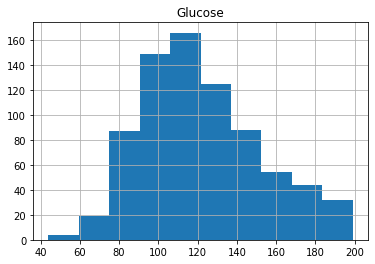

In [ ]:
diabetes_df['Glucose'].hist()
plt.title("Glucose")
plt.show()

In [ ]:
#Checking out the missing values in the BloodPressure column
diabetes_df["BloodPressure"].isnull().sum()

35

In [ ]:
#Calculating the median for the BloodPressure column
BloodPressure_median=diabetes_df['BloodPressure'].median()

In [ ]:
#Impute the missing values in to the BloodPressure column with median value which was generated.
diabetes_df['BloodPressure'].fillna(BloodPressure_median, inplace=True)

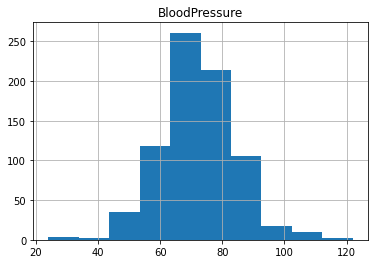

In [ ]:
diabetes_df['BloodPressure'].hist()
plt.title("BloodPressure")
plt.show()

In [ ]:
#Checking out the missing values in the SkinThickness column
diabetes_df["SkinThickness"].isnull().sum()

227

In [ ]:
#Calculating the median for the SkinThickness column
SkinThickness_median=diabetes_df['SkinThickness'].median()

In [ ]:
#Impute the missing values in to the SkinThickness column with median value which was generated.
diabetes_df['SkinThickness'].fillna(SkinThickness_median, inplace=True)

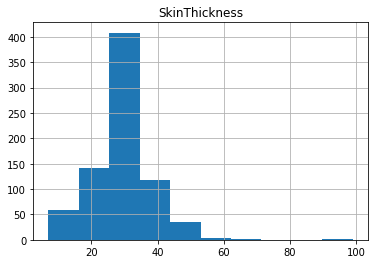

In [ ]:
diabetes_df['SkinThickness'].hist()
plt.title("SkinThickness")
plt.show()

In [ ]:
#Checking out the missing values in the Insulin column
diabetes_df["Insulin"].isnull().sum()

374

In [ ]:
#Calculating the median for the Insulin column
Insulin_median=diabetes_df['Insulin'].median()

In [ ]:
#Impute the missing values in to the Insulin column with median value which was generated.
diabetes_df['Insulin'].fillna(Insulin_median, inplace=True)

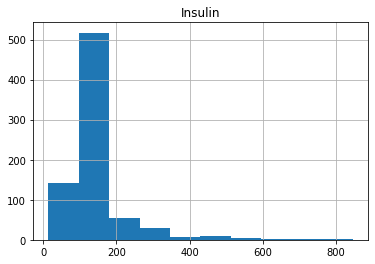

In [ ]:
diabetes_df['Insulin'].hist()
plt.title("Insulin")
plt.show()

In [ ]:
#Checking out the missing values in the BMI column
diabetes_df["BMI"].isnull().sum()

11

In [ ]:
#Calculating the median for the BMI column
BMI_median=diabetes_df['BMI'].median()

In [ ]:
#Impute the missing values in to the Insulin column with median value which was generated.
diabetes_df['BMI'].fillna(BMI_median, inplace=True)

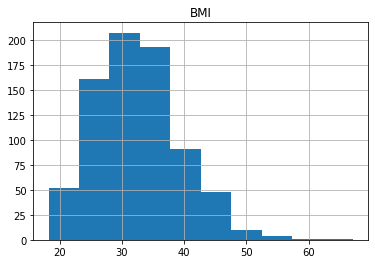

In [ ]:
diabetes_df['BMI'].hist()
plt.title("BMI")
plt.show()

3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

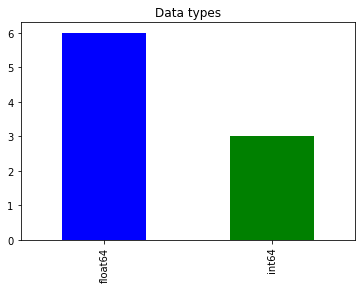

In [ ]:
#Creating a count plot for data types
data_types=diabetes_df.dtypes.value_counts()
data_types.plot(kind="bar",color=["b","g"])
plt.title("Data types")
plt.show()

In [ ]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Project Task 2
Data Exploration:

1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.


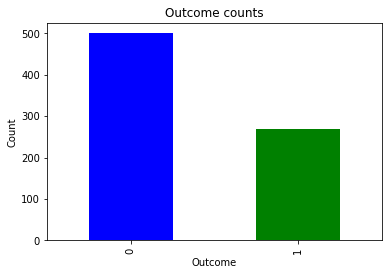

In [ ]:
#Plot the count of outcomes by their values, basically here it will indicate the data is imbalanced data or the balanced data
diabetes_df["Outcome"].value_counts().plot(kind="bar",color=["b","g"])
plt.title("Outcome counts")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()

2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

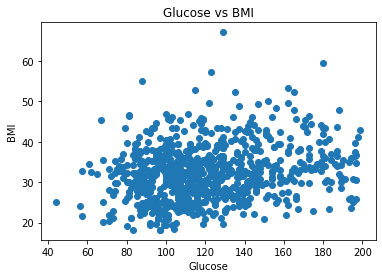

In [ ]:
#Creating the scatter plots between pairs of vriables such as the Glucose and BMI
plt.scatter(diabetes_df["Glucose"],diabetes_df["BMI"])
plt.title("Glucose vs BMI")
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.show()

In the above scenario or the plot we can define is that the there is a positive relationship between the two varibales, it says that if the value of Glucose increases,the value of BMI tends to increases as well.

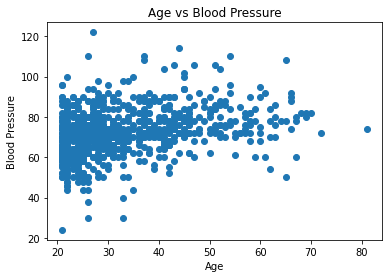

In [ ]:
#creating the scatter plots betweeen pairs of variables such as the Age and BloodPressure
plt.scatter(diabetes_df["Age"],diabetes_df["BloodPressure"])
plt.title("Age vs Blood Pressure")
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.show()

As we can observe in the outcome of the above scatter plot that there is an positive correlation that has been indicated, if the Age increases the Blood pressure also increases, so here it indicates that there has been strong relationship  between the varibale called Glucose and Blood Pressure

3) Perform Correlation Analysis:

To perform correlation analysis on the dataset, you can use the corr() function of pandas. Here's how you can do it:

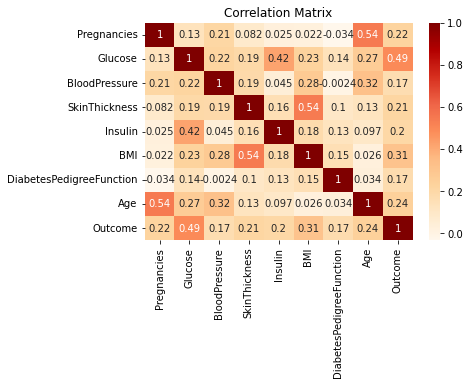

In [ ]:
#Importing the appropriate libraries
import seaborn as sns

#Calculating the correlation matrix
corr_matrix=diabetes_df.corr()

#Here the ploting of the correlation matrix can be done using the heat map
sns.heatmap(corr_matrix,annot=True, cmap="OrRd")
plt.title("Correlation Matrix")
plt.show()

Here in the above correlation matrix of a datasets it defines the how the variables are correlated with each other, her the darker side of the color defines the higher correlation and the lighter side of the color defines the lower correlation

Project Task 3

Data Modeling:

1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

Here are some strategies for model building:



1) First of all we have to define the problem: Start by clearly defining the problem you are trying to solve. We have to undertsand the what is the domain needs,What are the variables and factors that will help us to understand the problems, and what will be the outcome that we are trying to predict?


2)We have to collect and clean data, the could be of any kind of data such as the text, image, video, voice or files. So we have to collect relevant data that can help us to build our model. The data may come from various sources, and you may need to clean, preprocess, and transform it to make it ready for analysis. This may involve dealing with missing values, outliers, and other data quality issues.


3)We have to explore and visualize the data sets, we have to use descriptive statistics and data visualization techniques in order to gain the insights and pattern into the data, and also to find the relationships between variables. This can help you identify potential variables that are important predictors of the outcome.


4)Another important task is to find and select the appropriate algorithm, once you have a good understanding of the data, choose an appropriate algorithm for your problem. Consider factors such as the type of data you have, the complexity of the problem, and the computational resources available to you. Popular machine learning algorithms include linear regression, logistic regression, decision trees, random forests, and neural networks etc.


5)Before building the model, it is important to decide the right validation framework. You can split the dataset into a training set and a testing set using techniques such as k-fold cross-validation or stratified sampling. Since the dataset is imbalanced, you may also want to use techniques such as oversampling or undersampling to balance the dataset.


6)We have to train and test the modeSplit the data into training and testing sets, and use the training set to train the model. Evaluate the performance of the model using the testing set. Use metrics such as accuracy, precision, recall, and F1 score to measure the performance of the model.


7) And also tune and optimize the model once you have a baseline model, try to optimize its performance by tweaking the algorithm and its parameters. This may involve hyperparameter tuning, feature selection, and regularization techniques. Be careful not to overfit the model to the training data.


7)Deploying the model once it is finished building and monitor the model: Once you have a model that performs well on the testing data, deploy it to production and monitor its performance over time. Update the model as new data becomes available and as the problem evolves.



2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

In [ ]:
#Import the appropriate libraries
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [ ]:
#Separating the Features and the Target variables
X=diabetes_df.drop("Outcome",axis=1)
y=diabetes_df["Outcome"]

In [ ]:
#Performing the random under sampling to balance the dataset
rus = RandomUnderSampler(random_state=42)
X_resampled,y_resampled=rus.fit_resample(X,y)

In [ ]:
#Now performing the SMOTE oversampling to balance the datasets
smote=SMOTE(random_state=42)
X_resampled,y_resampled=smote.fit_resample(X_resampled,y_resampled)

In [ ]:
#Creating the new DataFrame from the resampled data
resampled_df=pd.concat([pd.DataFrame(X_resampled),pd.DataFrame({"Outcome":y_resampled})],axis=1)

In [ ]:
resampled_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               536 non-null    int64  
 1   Glucose                   536 non-null    float64
 2   BloodPressure             536 non-null    float64
 3   SkinThickness             536 non-null    float64
 4   Insulin                   536 non-null    float64
 5   BMI                       536 non-null    float64
 6   DiabetesPedigreeFunction  536 non-null    float64
 7   Age                       536 non-null    int64  
 8   Outcome                   536 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 37.8 KB


In [ ]:
#Separating the Features and the Target variables
X=resampled_df.drop("Outcome",axis=1)
y=resampled_df["Outcome"]


In [ ]:
#Now splitting the data sets for tarining and testing purpose
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30, random_state=42)


In [ ]:
#Used the standardScalar to reduce the outliers in the data sets
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [ ]:
#Building the KNN model inorder to train and test the model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
#Evaluation of the model inorder to predict data with actual data and also to check the performance of the model.
from sklearn import metrics
y_pred=knn.predict(X_test)
acc=metrics.accuracy_score(y_test,y_pred)
ps=metrics.precision_score(y_test,y_pred)
rs=metrics.recall_score(y_test,y_pred)
f1=metrics.f1_score(y_test,y_pred)
print("Accuracy score of KNN is", acc)
print("Precision score of KNN is", ps)
print("Recall score of KNN is", rs)
print("F1 score of KNN is", f1)
print("Predicted outcome is", y_pred)


Accuracy score of KNN is 0.7515527950310559
Precision score of KNN is 0.7528089887640449
Recall score of KNN is 0.788235294117647
F1 score of KNN is 0.7701149425287356
Predicted outcome is [0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0
 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1
 0 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1
 0 1 1 1 1 1 0 1 1 0 0 1 0]


In [ ]:
#Building the Random Forest model inorder to train and test the model
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
#Evaluation of the model inorder to predict data with actual data and also to check the performance of the model.
from sklearn import metrics
y_pred=rfc.predict(X_test)
acc=metrics.accuracy_score(y_test,y_pred)
ps=metrics.precision_score(y_test,y_pred)
rs=metrics.recall_score(y_test,y_pred)
f1=metrics.f1_score(y_test,y_pred)
print("Accuracy score of rfc is", acc)
print("Precision score of rfc is", ps)
print("Recall score of KNN rfc", rs)
print("F1 score of rfc is", f1)
print("Predicted outcome is", y_pred)

Accuracy score of rfc is 0.7763975155279503
Precision score of rfc is 0.8181818181818182
Recall score of KNN rfc 0.7411764705882353
F1 score of rfc is 0.7777777777777777
Predicted outcome is [0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 0
 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1
 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1
 0 1 1 1 1 0 0 1 0 0 0 1 0]


In [ ]:
#Building the Decision Tree classifier model inorder to train and test the model
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
#Evaluation of the model inorder to predict data with actual data and also to check the performance of the model.
from sklearn import metrics
y_pred=dtc.predict(X_test)
acc=metrics.accuracy_score(y_test,y_pred)
ps=metrics.precision_score(y_test,y_pred)
rs=metrics.recall_score(y_test,y_pred)
f1=metrics.f1_score(y_test,y_pred)
print("Accuracy score of dtc is", acc)
print("Precision score of dtc is", ps)
print("Recall score of KNN dtc", rs)
print("F1 score of dtc is", f1)
print("Predicted outcome is", y_pred)

Accuracy score of dtc is 0.7267080745341615
Precision score of dtc is 0.7662337662337663
Recall score of KNN dtc 0.6941176470588235
F1 score of dtc is 0.7283950617283951
Predicted outcome is [0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1
 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 0 0
 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0
 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1
 0 1 1 1 1 0 0 0 0 0 0 0 0]


In [ ]:
#Building the Gaussian Naive Bayes classifier model inorder to train and test the model
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [ ]:
#Evaluation of the model inorder to predict data with actual data and also to check the performance of the model.
from sklearn import metrics
y_pred=gnb.predict(X_test)
acc=metrics.accuracy_score(y_test,y_pred)
ps=metrics.precision_score(y_test,y_pred)
rs=metrics.recall_score(y_test,y_pred)
f1=metrics.f1_score(y_test,y_pred)
print("Accuracy score of gnb is", acc)
print("Precision score of gnb is", ps)
print("Recall score of KNN gnb", rs)
print("F1 score of gnb is", f1)
print("Predicted outcome is", y_pred)

Accuracy score of gnb is 0.7267080745341615
Precision score of gnb is 0.8253968253968254
Recall score of KNN gnb 0.611764705882353
F1 score of gnb is 0.7027027027027026
Predicted outcome is [0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1
 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1
 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1
 0 1 1 1 1 0 0 1 0 0 0 1 0]


In [ ]:
#Building the Gradient Boosting classifier model inorder to train and test the model
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
#Evaluation of the model inorder to predict data with actual data and also to check the performance of the model.
from sklearn import metrics
y_pred=gbc.predict(X_test)
acc=metrics.accuracy_score(y_test,y_pred)
ps=metrics.precision_score(y_test,y_pred)
rs=metrics.recall_score(y_test,y_pred)
f1=metrics.f1_score(y_test,y_pred)
print("Accuracy score of gbc is", acc)
print("Precision score of gbc is", ps)
print("Recall score of gbc", rs)
print("F1 score of gbc is", f1)
print("Predicted outcome is", y_pred)

Accuracy score of gbc is 0.7701863354037267
Precision score of gbc is 0.8157894736842105
Recall score of gbc 0.7294117647058823
F1 score of gbc is 0.7701863354037266
Predicted outcome is [0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1
 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1
 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1
 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0
 0 1 0 1 1 0 0 1 0 0 0 1 0]


In [ ]:
#Building the Logistic Regression classifier model inorder to train and test the model
from sklearn.linear_model import LogisticRegression
lgc=LogisticRegression()
lgc.fit(X_train,y_train)

LogisticRegression()

In [ ]:
#Evaluation of the model inorder to predict data with actual data and also to check the performance of the model.
from sklearn import metrics
y_pred=lgc.predict(X_test)
acc=metrics.accuracy_score(y_test,y_pred)
ps=metrics.precision_score(y_test,y_pred)
rs=metrics.recall_score(y_test,y_pred)
f1=metrics.f1_score(y_test,y_pred)
print("Accuracy score of lgc is", acc)
print("Precision score of lgc is", ps)
print("Recall score of lgc", rs)
print("F1 score of lgc is", f1)
print("Predicted outcome is", y_pred)

Accuracy score of lgc is 0.7639751552795031
Precision score of lgc is 0.821917808219178
Recall score of lgc 0.7058823529411765
F1 score of lgc is 0.759493670886076
Predicted outcome is [0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1
 0 1 1 1 1 0 0 1 0 0 0 1 0]


Project Task 4

Data Modeling:

1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

              precision    recall  f1-score   support

           0       0.72      0.80      0.76        76
           1       0.80      0.72      0.76        85

    accuracy                           0.76       161
   macro avg       0.76      0.76      0.76       161
weighted avg       0.76      0.76      0.76       161

AUC: 0.8506191950464396


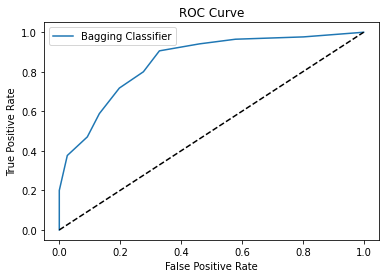

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Train the model
BaggingClassifier = BaggingClassifier(random_state=42)
BaggingClassifier.fit(X_train, y_train)

# Predict on the testing set
y_pred = BaggingClassifier.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

# AUC (ROC curve)
y_pred_proba = BaggingClassifier.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC:", auc)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='Bagging Classifier')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

The classification report provides metrics to evaluate the performance of a classification model.

Precision: 

This metric measures the proportion of true positives among the total number of predicted positives. For the class 0, the precision is 0.72, which means that out of all the samples predicted as 0, 72% were actually 0. For the class 1, the precision is 0.80, which means that out of all the samples predicted as 1, 80% were actually 1.

Recall: 

This metric measures the proportion of true positives among the total number of actual positives. For the class 0, the recall is 0.80, which means that out of all the actual samples that are 0, 80% were correctly identified as 0. For the class 1, the recall is 0.72, which means that out of all the actual samples that are 1, 72% were correctly identified as 1.

F1-score: 

This metric is the harmonic mean of precision and recall, and provides a balance between the two. It ranges from 0 to 1, with 1 indicating the best possible score. For both classes, the F1-score is 0.76, which means that the model performs equally well in terms of precision and recall for both classes.

Support:

This metric is the number of samples in each class.

Accuracy: 

This metric measures the proportion of correct predictions among the total number of predictions. The overall accuracy of the model is 0.76, which means that 76% of the predictions were correct.

Macro Avg: 

This is the average of precision, recall, and F1-score across all classes, and gives equal weight to each class. In this case, the macro average for all metrics is 0.76.

Weighted Avg: 

This is the weighted average of precision, recall, and F1-score across all classes, and gives more weight to the class with more samples. In this case, the weighted average for all metrics is also 0.76, which indicates that the model performs equally well for both classes.
